In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from sklearn.model_selection import train_test_split

In [12]:
df=pd.read_csv(r"C:\Users\AnnamalaiG\OneDrive\Desktop\Coures 8\DS1_C8_Computers_Data_Project.csv")

In [14]:
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [16]:
df.columns

Index(['index', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads_2022', 'ads_2023', 'trend'],
      dtype='object')

In [20]:
# Task 1 a)
filtered_df = df[(df['ram'] >= 8) & (df['screen'] == 14) & (df['speed'] > 33)]
filtered_count = filtered_df.shape[0]
total_count = df.shape[0]
purchase_probability = filtered_count / total_count
print(f"Probability of purchasing a computer with the given specifications: {purchase_probability:.2%}")

Probability of purchasing a computer with the given specifications: 16.02%


In [40]:
# Task 1 b)
total_computers = df.shape[0]
premium_computers = df[df['premium'] == 1].shape[0]
if premium_computers != 0:
    probability_premium = premium_computers / total_computers
    premium_with_cd = df[(df['premium'] == 1) & (df['cd'] == 1)].shape[0]
    probability_cd_given_premium = premium_with_cd / premium_computers

    print(f"Probability of selling a premium computer: {probability_premium:.2%}")
    print(f"Probability of having a CD player given the computer is premium: {probability_cd_given_premium:.2%}")
else:
    print("There are no premium computers in the dataset.")


There are no premium computers in the dataset.


In [46]:
# Task 1 c)
not_premium = df[df['premium'] == 0]
not_premium_screen_small = not_premium[not_premium['screen'] <= 14].shape[0]
if not_premium.shape[0] != 0:
    probability_screen_small_given_not_premium = not_premium_screen_small / not_premium.shape[0]
    print(f"Probability of having a screen size > 15 inches and being premium: {probability_screen_and_premium:.2%}")
    print(f"Probability of having a small screen size given the computer is not premium: {probability_screen_small_given_not_premium:.2%}")
else:
    print("There are no non-premium computers in the dataset.")

There are no non-premium computers in the dataset.


In [42]:
# Task 1 d)
total_computers = df.shape[0]
cd_and_multi = df[(df['cd'] == 1) & (df['multi'] == 1)].shape[0]
cd_only = df[df['cd'] == 1].shape[0]
if cd_only != 0:
    joint_probability = cd_and_multi / total_computers
    conditional_probability = cd_and_multi / cd_only

    print(f"Joint probability of having both a CD player and a multimedia kit: {joint_probability:.2%}")
    print(f"Given a computer has a CD player, probability it also has a multimedia kit: {conditional_probability:.2%}")
else:
    print("There are no computers with a CD player in the dataset.")

There are no computers with a CD player in the dataset.


In [30]:
# Task 2 a)
average_price_population = df['price'].mean()
print(f"The average price of computers in the whole data is: ${average_price_population:.2f}")

The average price of computers in the whole data is: $2219.58


In [34]:
# Task 2 a)
sample_size = int(0.1 * df.shape[0])
srs_sample = df.sample(n=sample_size, replace=False)
srs_avg_price = srs_sample['price'].mean()
step = len(df) // sample_size
systematic_sample = df.iloc[::step]
systematic_avg_price = systematic_sample['price'].mean()

strata_premium = df[df['premium'] == 1]
strata_non_premium = df[df['premium'] == 0]

premium_sample = strata_premium.sample(frac=sample_size / len(df))
non_premium_sample = strata_non_premium.sample(frac=sample_size / len(df))

stratified_sample = pd.concat([premium_sample, non_premium_sample])
stratified_avg_price = stratified_sample['price'].mean()

print(f"Average price using Simple Random Sampling: ${srs_avg_price:.2f}")
print(f"Average price using Systematic Sampling: ${systematic_avg_price:.2f}")
print(f"Average price using Stratified Sampling: ${stratified_avg_price:.2f}")

Average price using Simple Random Sampling: $2230.97
Average price using Systematic Sampling: $2220.65
Average price using Stratified Sampling: $nan


In [36]:
# Task 2 c)
avg_price_premium = df[df['premium'] == 1]['price'].mean()
avg_price_non_premium = df[df['premium'] == 0]['price'].mean()
print(f"Average price of premium computers: ${avg_price_premium:.2f}")
print(f"Average price of non-premium computers: ${avg_price_non_premium:.2f}")

avg_price_premium_sample = srs_sample[srs_sample['premium'] == 1]['price'].mean()
avg_price_non_premium_sample = srs_sample[srs_sample['premium'] == 0]['price'].mean()
print(f"Average price of premium computers in sampled data: ${avg_price_premium_sample:.2f}")
print(f"Average price of non-premium computers in sampled data: ${avg_price_non_premium_sample:.2f}")

Average price of premium computers: $nan
Average price of non-premium computers: $nan
Average price of premium computers in sampled data: $nan
Average price of non-premium computers in sampled data: $nan


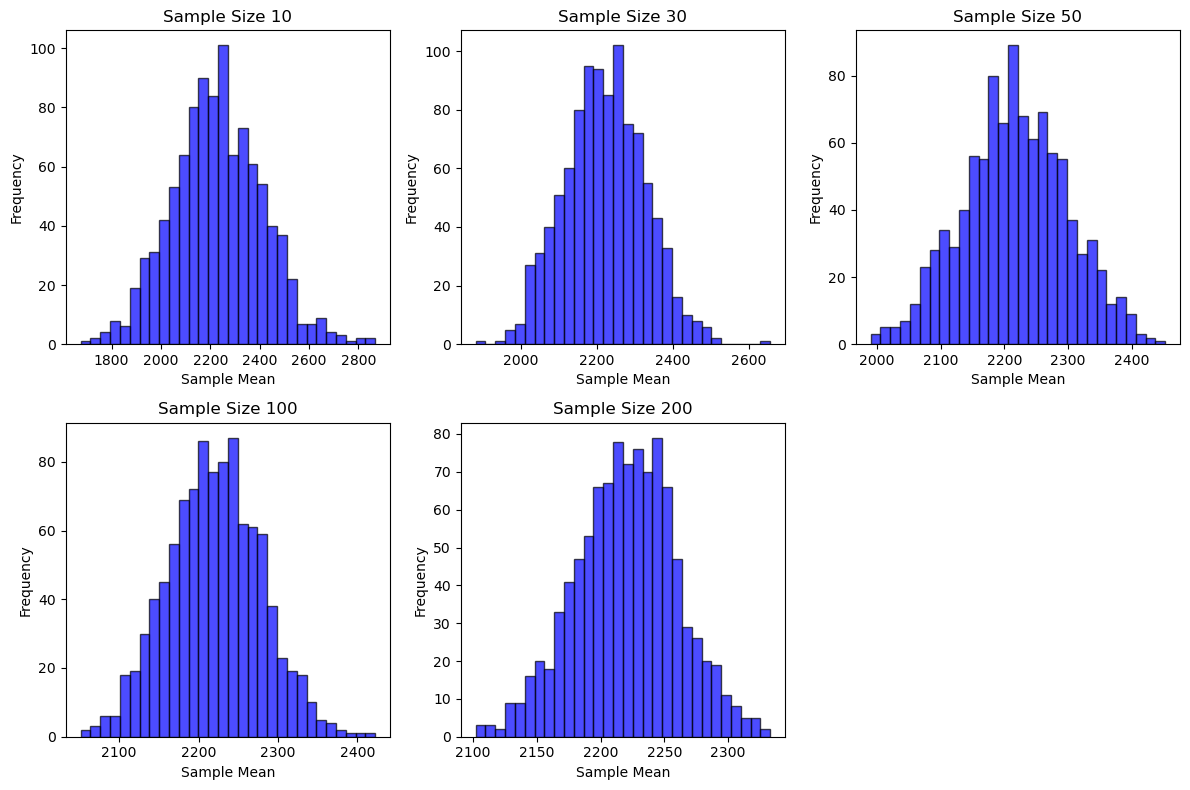

Central Limit Theorem Properties Verification:
Sample Size 10:
- Mean of Sample Means: 2227.94 (Population Mean: 2219.58)
- Observed SE: 183.49 (Expected SE: 183.67)

Sample Size 30:
- Mean of Sample Means: 2220.36 (Population Mean: 2219.58)
- Observed SE: 105.27 (Expected SE: 106.04)

Sample Size 50:
- Mean of Sample Means: 2216.66 (Population Mean: 2219.58)
- Observed SE: 81.92 (Expected SE: 82.14)

Sample Size 100:
- Mean of Sample Means: 2220.09 (Population Mean: 2219.58)
- Observed SE: 58.61 (Expected SE: 58.08)

Sample Size 200:
- Mean of Sample Means: 2220.10 (Population Mean: 2219.58)
- Observed SE: 39.90 (Expected SE: 41.07)



In [38]:
# Task 3

sample_sizes = [10, 30, 50, 100, 200]  
n_iterations = 1000 
population_mean = df['price'].mean()
population_std = df['price'].std()
sample_means = {}
for size in sample_sizes:
    means = []
    for _ in range(n_iterations):
        sample = df['price'].sample(n=size, replace=False)
        means.append(sample.mean())
    sample_means[size] = means

plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes, 1):
    plt.subplot(2, 3, i)
    plt.hist(sample_means[size], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Sample Size {size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Central Limit Theorem Properties Verification:")
for size in sample_sizes:
    mean_of_means = np.mean(sample_means[size])
    std_error = np.std(sample_means[size]) 
    expected_se = population_std / np.sqrt(size)
    print(f"Sample Size {size}:")
    print(f"- Mean of Sample Means: {mean_of_means:.2f} (Population Mean: {population_mean:.2f})")
    print(f"- Observed SE: {std_error:.2f} (Expected SE: {expected_se:.2f})\n")
